<a href="https://colab.research.google.com/github/wandamoosejaw/DataScienceStudySession/blob/main/dataSciencePractice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Data Assignment**
Answered the https://github.com/wandamoosejaw/Data-Science-For-Beginners/blob/main/1-Introduction/04-stats-and-probability/assignment.ipynb

In [6]:
#import libraries
import pandas as pd
import numpy as np

#copying the link of the dataset from github so downloading it locally is no longer necessary
#step 1: click the raw beside the copy icon
#step 2: copy the URL on the browser bar
url ='https://raw.githubusercontent.com/wandamoosejaw/Data-Science-For-Beginners/refs/heads/main/data/diabetes.tsv'

df= pd.read_csv(url, sep='\t') #\t stands for tab-separated values
df.head() #displays the first 5 rows of DataFrame by default

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


#**Task 1: Compute mean values and variance for all values**

In [14]:
#aggregated .mean() and .var()
df[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6','Y']].agg(['mean','var'])

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
mean,48.51810,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
var,171.84661,0.249561,19.519798,191.304401,1197.717241,924.955494,167.293585,1.665261,0.272892,132.165712,5943.331348


#**Task 2: Plot boxplots for BMI, BP and Y depending on gender**

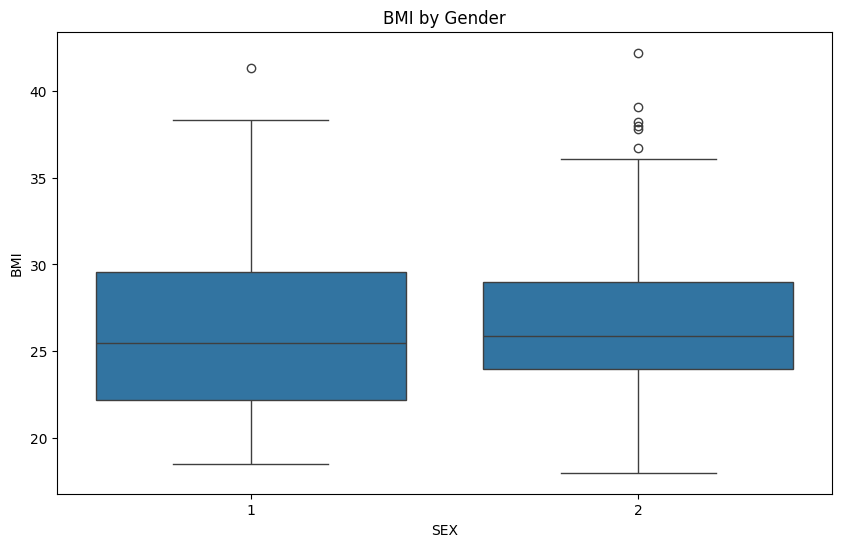

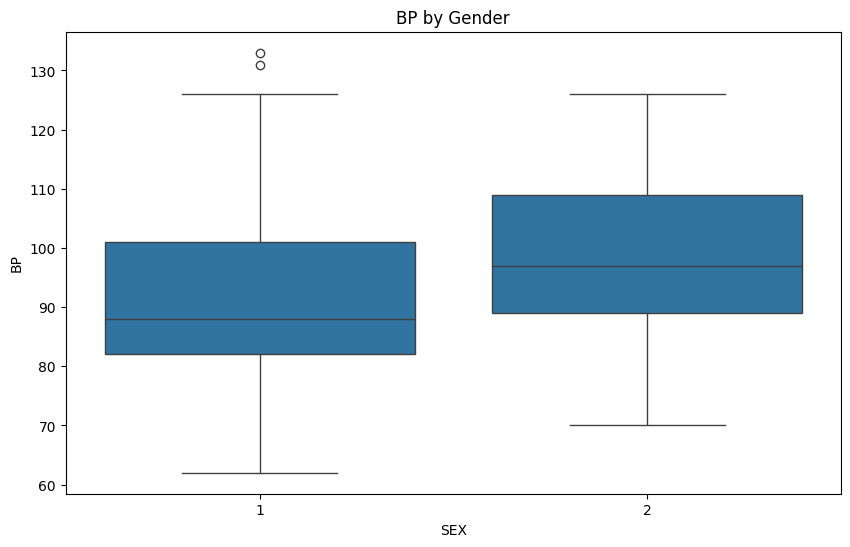

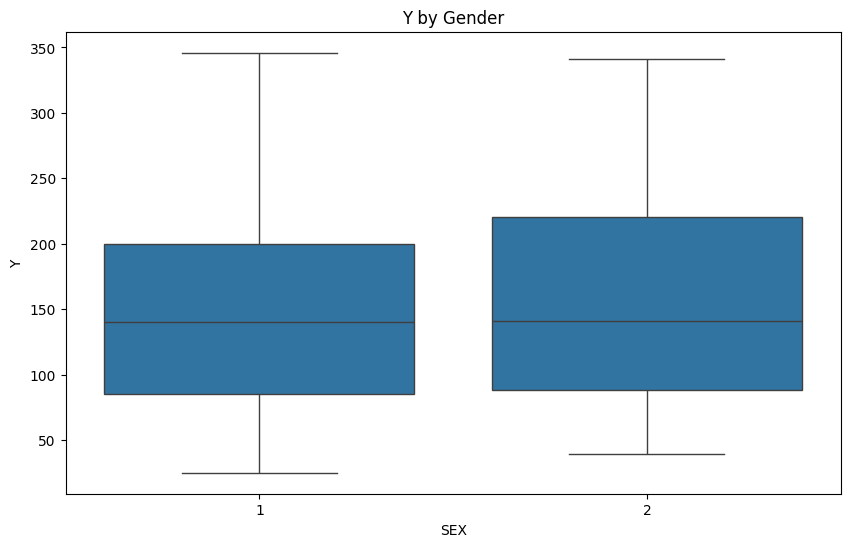

In [16]:
#use seaborn
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['BMI','BP', 'Y']: #create a loop to generate boxplots for each
    plt.figure(figsize=(10,6)) #set the figure in inches
    sns.boxplot(x='SEX', y=col, data=df) #x axis of the grap is SEX, y is the column (either BMI, BP, and Y), data that will be used = df
    plt.title(f'{col} by Gender') #title of the graph
    plt.show() #display the graph

# **Task 3: What is the distribution of Age, Sex, BMI and Y variables?**

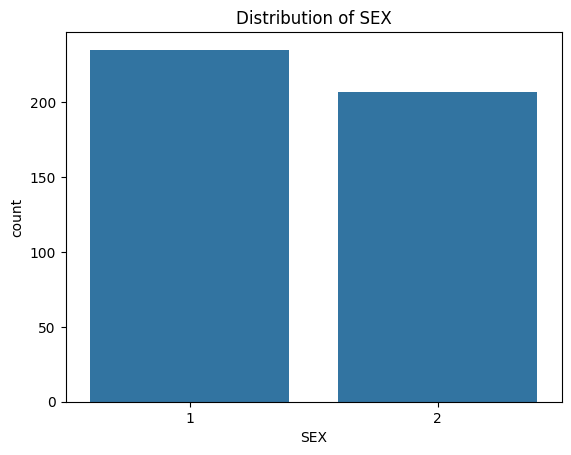

In [20]:
#Distribution of SEX
#Sex is categorical, so t must show a count plot/bar chart.
sns.countplot(data=df, x='SEX')
plt.title('Distribution of SEX')
plt.show()

Text(0.5, 1.0, 'Distribution of AGE')

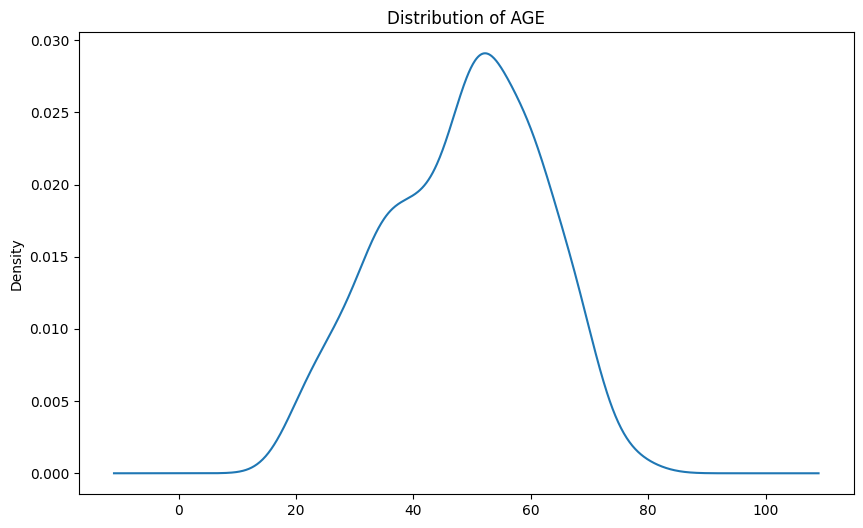

In [22]:
#Distribution of AGE
df['AGE'].plot(kind='kde', figsize=(10,6)) #create a KDE plot
plt.title('Distribution of AGE')

Text(0.5, 1.0, 'Distribution of Y')

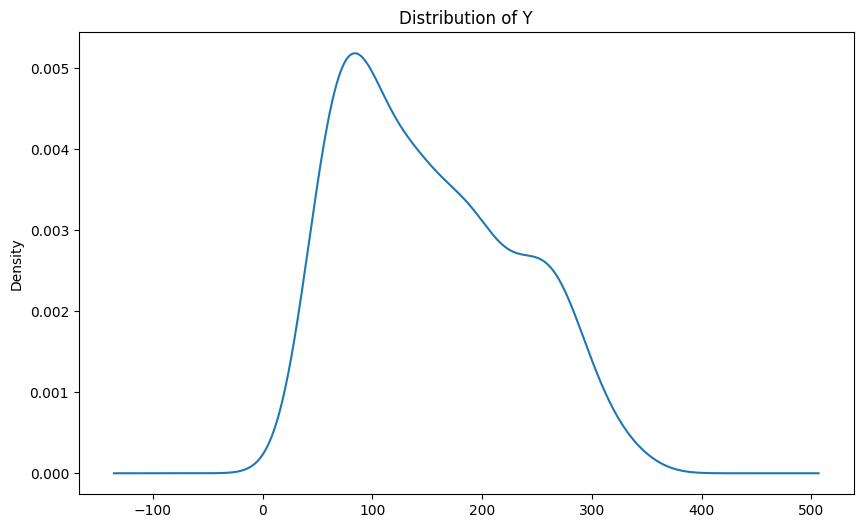

In [27]:
#Distribution of Y
df['Y'].plot(kind='kde', figsize=(10,6)) #create a KDE plot
plt.title('Distribution of Y')


Text(0.5, 1.0, 'Distribution of BMI')

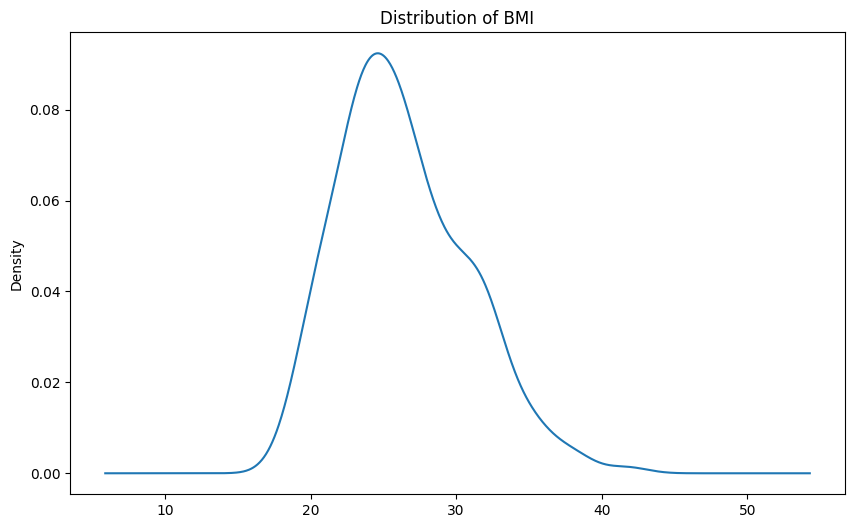

In [26]:
#Distribution of BMI
df['BMI'].plot(kind='kde', figsize=(10,6)) #create a KDE plot
plt.title('Distribution of BMI')

# **Task 4: Test the correlation between different variables and disease progression(Y)**

/tmp/ipython-input-556790913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_Y.values, y=corr_with_Y.index, palette="coolwarm") #create a barplot out of the computation


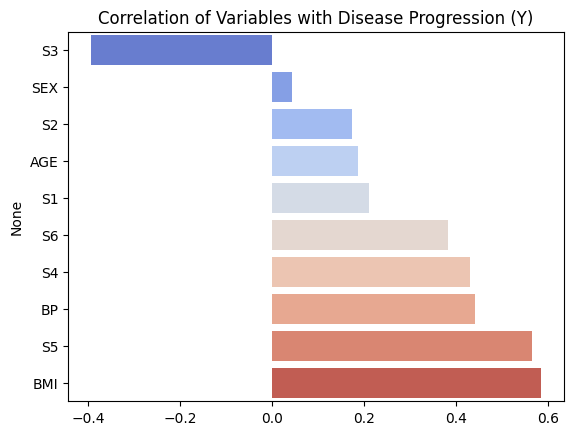

In [29]:
#correlation = using heatmaps or scatterplot to define connections
#use .corr() in pandas

corr_with_Y =df.corr()['Y'].drop('Y').sort_values() #compute the correlation of all variables in Y
#variable name = select all the column headers except Y and correlate them with Y, then sort the values
sns.barplot(x=corr_with_Y.values, y=corr_with_Y.index, palette="coolwarm") #create a barplot out of the computation
plt.title('Correlation of Variables with Disease Progression (Y)') #title of the graph
plt.show() #display the graph

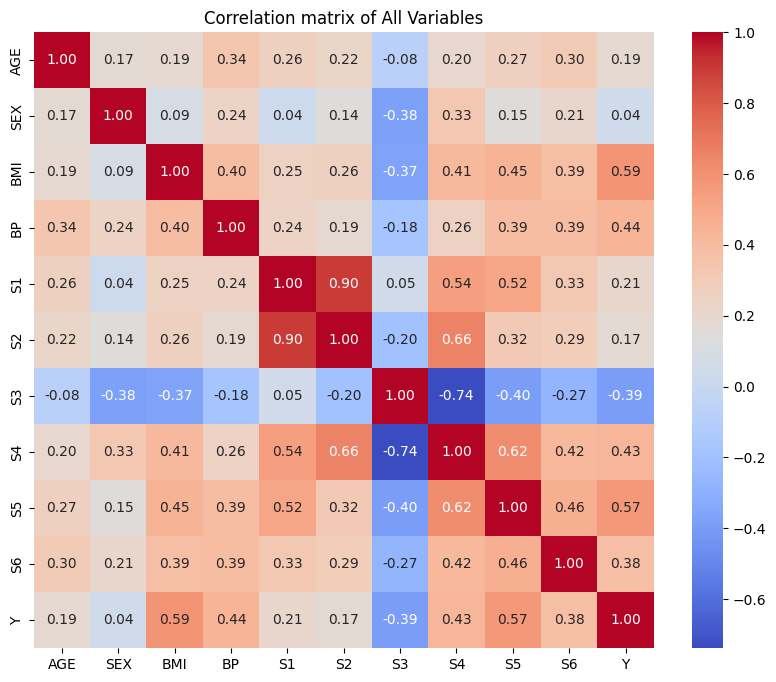

In [31]:
#compute correlation matrix
corr = df.corr()

plt.figure(figsize=(10,8)) #set figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",cbar=True) #use seaborn to create a heatmap
plt.title('Correlation matrix of All Variables') #set the title for the graph
plt.show() #display the heatmap

#annot- shows the correlation inside the cells
#cmap - color scale
#fmt - keeps the numbers neat with 2 decimals

# **Test the hypothesis that the degree of diabetes progression is different between men and women**

/tmp/ipython-input-4247519995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SEX', y='Y', data=df, palette='Set2')


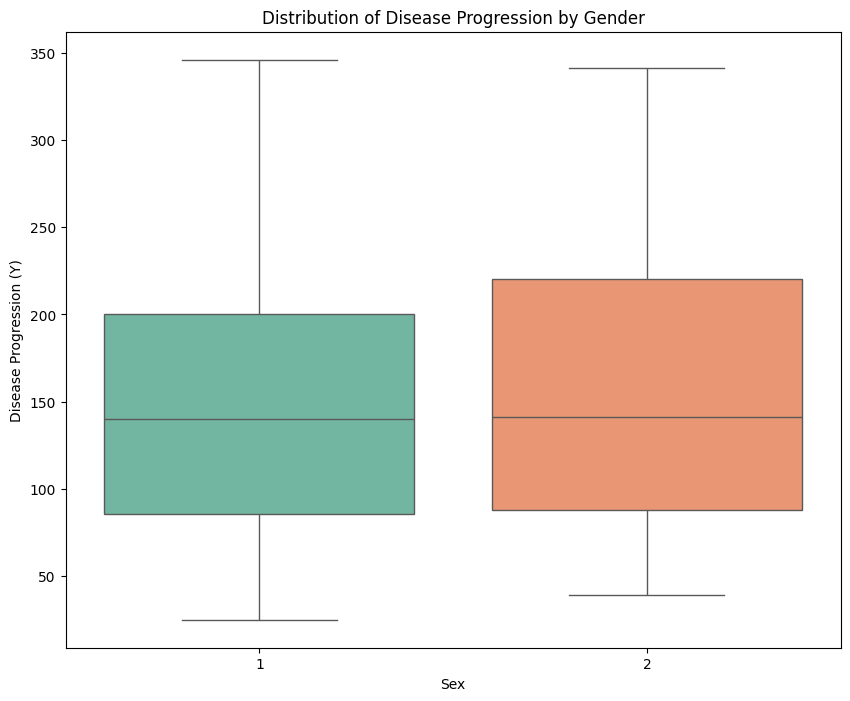

In [32]:
#Create a box plot
plt.figure(figsize=(10,8))  #set the size
sns.boxplot(x='SEX', y='Y', data=df, palette='Set2') #create the box plot
plt.title('Distribution of Disease Progression by Gender') #set the title
plt.xlabel('Sex') #label the x-axis
plt.ylabel('Disease Progression (Y)') #label the y-axis
plt.show() #display


Both men and women have similar medians for disease progression, meaning the central tendency is nearly the same. Group 2 shows a larger interquartile range, suggesting more variability in progression within that group. There are no clear outliers in either group. Overall, since the medians are close and the distributions overlap considerably, the boxplot does not provide strong evidence that the degree of diabetes progression is different between men and women.